In [44]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import TomekLinks

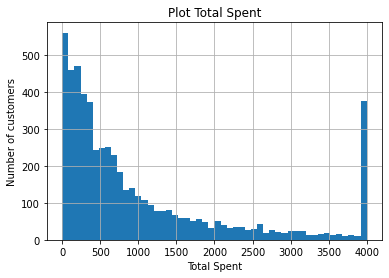

2863
1762
950


In [2]:
df = pd.read_csv("dataset/CS1-dataset.csv",sep='\t',decimal=",",index_col=0)
for i in range(len(df)):
    if(df["Ts"].iloc[i]>4000):
        df["Ts"].iloc[i] = 4000

df["Ts"].hist(bins=50)
plt.title("Plot Total Spent")
plt.xlabel("Total Spent")
plt.ylabel("Number of customers")
plt.show()
low_value=600
high_value=2000
low=len(df[df["Ts"]<low_value])
high=len(df[df["Ts"]>high_value])
print(low) 
print(len(df[(df["Ts"]>=low_value) & (df["Ts"]<=high_value)]))
print(high)  

In [3]:
def get_label():
     temp = pd.read_csv("dataset/CS1-dataset.csv",sep='\t',decimal=",",index_col=0)
     output = []
     for i in range(len(temp)):
          if(df["Ts"].iloc[i]<low_value):
               output.append(0)
          elif(df["Ts"].iloc[i]>high_value):
               output.append(2)
          else:
               output.append(1)

     temp["class"] = output
     return temp

In [31]:
def label(bins=0,label=0):
    temp[temp["class"]==label]["Ts"].hist(bins=bins)
    plt.title("Plot Total Spent")
    plt.xlabel("Total Spent")
    plt.ylabel("Number of customers")
    plt.show()

    temp[temp["class"]==label]["Ts"].plot.box()
    plt.title("Boxplot Total Spent")
    plt.show()

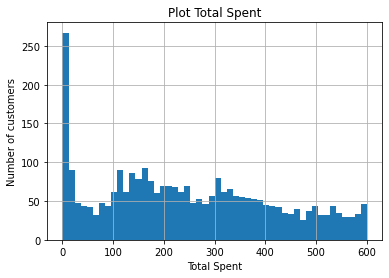

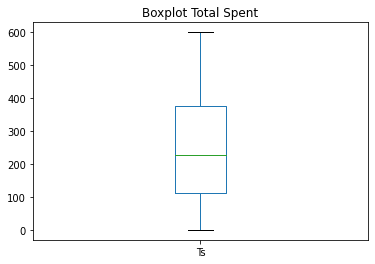

In [65]:
label(bins=50,label=0)

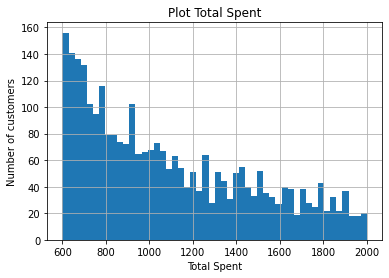

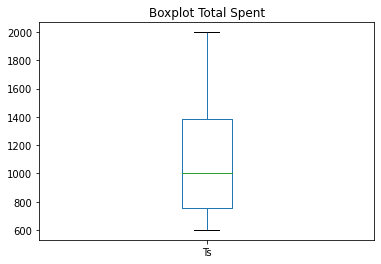

In [66]:
label(bins=50,label=1)

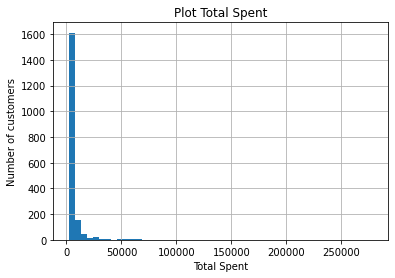

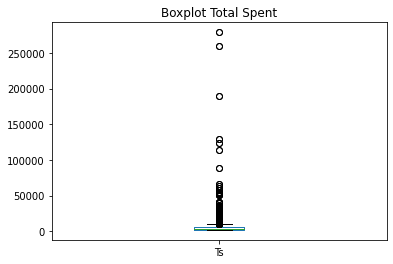

In [67]:
label(bins=50,label=2)

In [55]:
from imblearn.under_sampling import RandomUnderSampler 
def sampling_dataframe(sampling):
    oversampled = get_label()
    to_append = oversampled[~oversampled.CustomerID.str.contains("N")]
    oversampled = oversampled[~oversampled.CustomerID.str.contains("N")]

    print("Before Len class: 0 "+ str(len(oversampled[oversampled["class"]==0])))
    print("Before Len class: 1 "+ str(len(oversampled[oversampled["class"]==1])))
    print("Before Len class: 1 "+ str(len(oversampled[oversampled["class"]==2])))
    oversampled["CustomerID"] = oversampled.CustomerID.astype(float).astype(int)
    print("---------------------")
    if(sampling=="over"):
        sm = SMOTE(random_state=42)
        X = oversampled.drop("class",axis=1)
        X_res, y_res = sm.fit_resample(X, oversampled["class"])
    else:
        tl = RandomUnderSampler()
        X = oversampled.drop("class",axis=1)
        X_res, y_res = tl.fit_resample(X, oversampled["class"])
    oversampled = pd.DataFrame(X_res)
    oversampled["class"] = y_res
    oversampled["CustomerID"] = oversampled.CustomerID.astype(str)
    #oversampled = oversampled.append(to_append)
    print("After Len class: 0 "+ str(len(oversampled[oversampled["class"]==0])))
    print("After Len class: 1 "+ str(len(oversampled[oversampled["class"]==1])))
    print("After Len class: 1 "+ str(len(oversampled[oversampled["class"]==2])))
    print("---------------------------------------------------------------")
    return oversampled

In [56]:
print("Oversampling the dataset")
oversampled = sampling_dataframe(sampling="over")
print("Undersampling the dataset")
undersampled = sampling_dataframe(sampling="under")

Oversampling the dataset
Before Len class: 0 2008
Before Len class: 1 1437
Before Len class: 1 877
---------------------
After Len class: 0 2008
After Len class: 1 2008
After Len class: 1 2008
---------------------------------------------------------------
Undersampling the dataset
Before Len class: 0 2008
Before Len class: 1 1437
Before Len class: 1 877
---------------------
After Len class: 0 877
After Len class: 1 877
After Len class: 1 877
---------------------------------------------------------------
